In [88]:
import random
import os
import numpy as np
import torch

def seed_everything(seed):
    """
    """
    # 1. Python & Numpy
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

    # 2. PyTorch (CPU & GPU)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    print(f"🔒 Locked Random Seed: {seed}")



In [89]:
import torch
import numpy as np
import random

def seed_everything_random():
    """
    Tạo random seed, set seed đó, và return seed để bạn biết
    """
    # Tạo random seed
    random_seed = random.randint(0, 999999)

    # Set seed
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)

    # Để reproducible
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    return random_seed


In [90]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import gc

def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()

In [91]:
#load data
df_men = pd.read_csv(r"C:\Users\Lenovo\Documents\Neu 2025-2026\Lab\Hillstrom-Men.csv")
df_men = df_men.drop(columns="Unnamed: 0")
print ("---------------------------")
print ("null count:")
print (df_men.isnull().sum())
print ("---------------------------")
print(df_men.dtypes)
print ("---------------------------")
print ("labels:")
print(df_men.columns.tolist())
print ("---------------------------")
print("data shape:")
print(df_men.shape)


---------------------------
null count:
recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
visit              0
conversion         0
spend              0
treatment          0
dtype: int64
---------------------------
recency              int64
history_segment     object
history            float64
mens                 int64
womens               int64
zip_code            object
newbie               int64
channel             object
visit                int64
conversion           int64
spend              float64
treatment            int64
dtype: object
---------------------------
labels:
['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel', 'visit', 'conversion', 'spend', 'treatment']
---------------------------
data shape:
(42613, 12)


In [92]:
#Hillstrom-men
#split num and cate

cate_cols = ['zip_code', 'channel']
df_men["history_segment"] =df_men["history_segment"].map({
    "1) $0 - $100": '1',
    "2) $100 - $200": "2",
    "3) $200 - $350": "3",
    "4) $350 - $500": "4",
    "5) $500 - $750": "5",
    "6) $750 - $1,000": "6",
    "7) $1,000 +": "7"
})
num_cols = ['recency', 'history_segment']

#split x y t
y_men = df_men["spend"]
t_men = df_men["treatment"]
x_men = df_men.drop(columns=["spend", "treatment", "visit", "conversion", 'history'])

x_men_encode = pd.get_dummies(x_men, columns=cate_cols, drop_first=True)
x_men_encode = x_men_encode.astype(int)
#train test split
x_men_train, x_men_test,t_men_train, t_men_test, y_men_train, y_men_test = train_test_split(x_men_encode,t_men.values, y_men.values, test_size=0.3, random_state=42, stratify=t_men)
# x_men_val, x_men_test, t_men_val, t_men_test, y_men_val, y_men_test = train_test_split(x_men_test_val, t_men_test_val, y_men_test_val, test_size= 0.75, random_state=42, stratify=t_men_test_val)

# scale
# scaler = StandardScaler()
# x_men_train = scaler.fit_transform(x_men_train)
# x_men_val = scaler.transform(x_men_val)
# x_men_test = scaler.transform(x_men_test)

x_men_train = x_men_train.values.astype(float)
# x_men_val = x_men_val.values.astype(float)
x_men_test = x_men_test.values.astype(float)
print (x_men_train[:10])

[[ 4.  1.  0.  1.  0.  1.  0.  1.  0.]
 [ 6.  3.  1.  1.  0.  0.  1.  1.  0.]
 [ 2.  4.  1.  0.  0.  1.  0.  0.  0.]
 [ 6.  1.  1.  0.  0.  1.  0.  0.  1.]
 [ 3.  1.  0.  1.  1.  0.  1.  1.  0.]
 [ 1.  4.  0.  1.  1.  1.  0.  0.  1.]
 [ 8.  3.  1.  0.  0.  0.  1.  0.  1.]
 [11.  1.  0.  1.  1.  0.  1.  1.  0.]
 [ 1.  6.  0.  1.  1.  0.  1.  0.  0.]
 [ 1.  1.  0.  1.  1.  1.  0.  1.  0.]]


In [93]:
#Transform to tensor
def to_tensor(df):
    return torch.tensor(df, dtype=torch.float32)

x_men_train_t = to_tensor(x_men_train)
# x_men_val_t = to_tensor(x_men_val)
x_men_test_t = to_tensor(x_men_test)

y_men_train_t = to_tensor(y_men_train).unsqueeze(1)
# y_men_val_t = to_tensor(y_men_val).unsqueeze(1)
y_men_test_t = to_tensor(y_men_test).unsqueeze(1)

t_men_train_t = to_tensor(t_men_train.astype(float)).unsqueeze(1)
# t_men_val_t = to_tensor(t_men_val.astype(float)).unsqueeze(1)
t_men_test_t = to_tensor(t_men_test.astype(float)).unsqueeze(1)

#Data loader
train_dataset = TensorDataset(x_men_train_t, t_men_train_t, y_men_train_t)
# val_dataset = TensorDataset(x_men_val_t, t_men_val_t, y_men_val_t)
test_dataset = TensorDataset(x_men_test_t, t_men_test_t, y_men_test_t)

batch_size = 800
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print ("-------------------------------------------------------------")
print ("✅Completed tranform to tensor✅")
print (f"Shape of train: x={x_men_train_t.shape}; y ={y_men_train_t.shape}; t={t_men_train_t.shape}")
# print (f"Shape of val: x={x_men_val_t.shape}; y={y_men_val_t.shape}; t={t_men_val_t.shape}")
print (f"Shape of test: x={x_men_test_t.shape}; y={y_men_test_t.shape}; t={t_men_test_t.shape}")



-------------------------------------------------------------
✅Completed tranform to tensor✅
Shape of train: x=torch.Size([29829, 9]); y =torch.Size([29829, 1]); t=torch.Size([29829, 1])
Shape of test: x=torch.Size([12784, 9]); y=torch.Size([12784, 1]); t=torch.Size([12784, 1])


Evaluation metrics

In [94]:
from metrics import auuc, auqc, lift, krcc

Build Model

In [95]:
from tarnet import Tarnet

In [96]:
# Thêm vào notebook trước khi train
print("📊 Data Distribution Check:")
print(f"Y train: mean={y_men_train.mean():.4f}, std={y_men_train.std():.4f}")
print(f"Y train zeros: {(y_men_train == 0).sum()} / {len(y_men_train)} ({(y_men_train == 0).sum()/len(y_men_train)*100:.1f}%)")
print(f"\nTreatment balance:")
print(f"  Train: {(t_men_train == 1).sum()} treated, {(t_men_train == 0).sum()} control")
print(f"  Test:  {(t_men_test == 1).sum()} treated, {(t_men_test == 0).sum()} control")

📊 Data Distribution Check:
Y train: mean=0.9945, std=14.5369
Y train zeros: 29565 / 29829 (99.1%)

Treatment balance:
  Train: 14915 treated, 14914 control
  Test:  6392 treated, 6392 control


In [97]:
# seed = 122423
# seed_everything(seed)

In [98]:

seed = seed_everything_random()
print(f"Using seed: {seed}")

# ... chạy training code của bạn ...

# Sau khi chạy xong, bạn biết seed là bao nhiêu
print(f"Experiment completed with seed: {seed}")

Using seed: 366395
Experiment completed with seed: 366395


In [99]:
clear_memory()
dragonnet = Tarnet(input_dim=x_men_train.shape[1], epochs=100,  learning_rate=1e-3)
dragonnet.fit(train_loader, test_loader)

print ("Complete training")

🔃🔃🔃Begin training Dragonnet🔃🔃🔃
Epoch 1 | Train Loss: 166222.4951 | VAL LOSS: 205187.5718
Epoch 2 | Train Loss: 165791.8752 | VAL LOSS: 204963.7004
Epoch 3 | Train Loss: 165870.2855 | VAL LOSS: 205280.8697
Epoch 4 | Train Loss: 165926.1445 | VAL LOSS: 205003.4034
Epoch 5 | Train Loss: 165784.2746 | VAL LOSS: 205102.1046
Epoch 6 | Train Loss: 165849.3590 | VAL LOSS: 204960.7352
Epoch 7 | Train Loss: 165721.9960 | VAL LOSS: 204831.5867
Epoch 8 | Train Loss: 165689.2523 | VAL LOSS: 204827.1661
Epoch 9 | Train Loss: 165712.5827 | VAL LOSS: 204816.0099
Epoch 10 | Train Loss: 165589.8240 | VAL LOSS: 204793.9178
Epoch 11 | Train Loss: 165603.4756 | VAL LOSS: 204818.8154
Epoch 12 | Train Loss: 165669.0404 | VAL LOSS: 204782.9972
Epoch 13 | Train Loss: 165691.2234 | VAL LOSS: 204850.2698
Epoch 14 | Train Loss: 165712.9154 | VAL LOSS: 204993.6459
Epoch 15 | Train Loss: 165670.6132 | VAL LOSS: 204826.7689
Epoch 16 | Train Loss: 165486.2692 | VAL LOSS: 204964.4997
Epoch 17 | Train Loss: 165514.3878

In [100]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_test_subset = x_men_test_t.to(device)
y0_pred, y1_pred = dragonnet.predict(x_test_subset)

print("\n📊 Model Output Check:")
print(f"y0_pred: min={y0_pred.min():.4f}, max={y0_pred.max():.4f}, mean={y0_pred.mean():.4f}")
print(f"y1_pred: min={y1_pred.min():.4f}, max={y1_pred.max():.4f}, mean={y1_pred.mean():.4f}")

uplift = (y1_pred - y0_pred).cpu().numpy().flatten()
print(f"Uplift:  min={uplift.min():.4f}, max={uplift.max():.4f}, std={uplift.std():.4f}")

if uplift.std() < 0.01:
    print("⚠️ WARNING: Model is predicting almost constant uplift!")


📊 Model Output Check:
y0_pred: min=0.2645, max=2.6196, mean=0.5033
y1_pred: min=0.4627, max=5.0004, mean=0.9441
Uplift:  min=0.1699, max=2.3808, std=0.3105


Evaluating baseline🔃🔃🔃


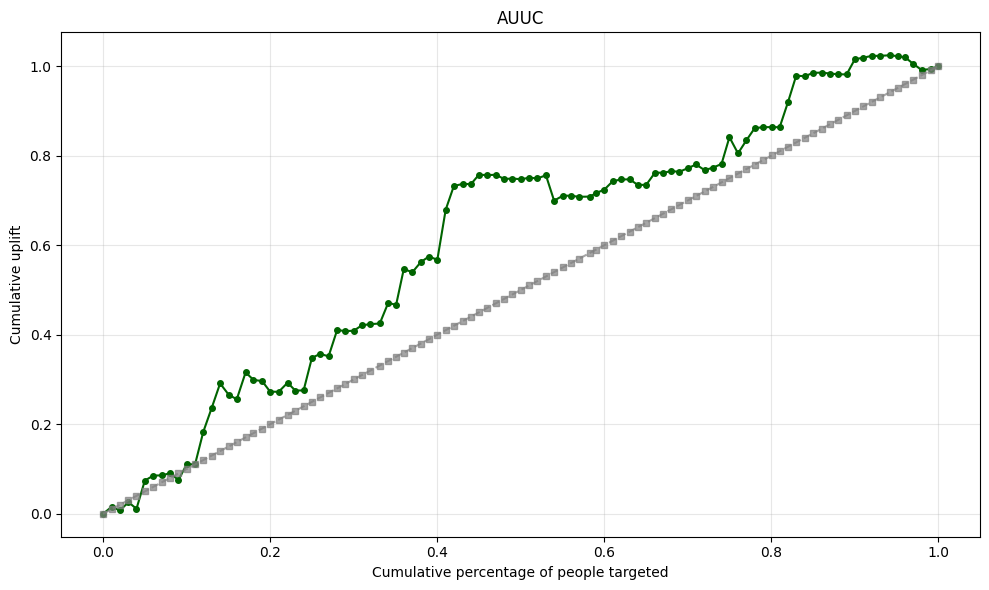

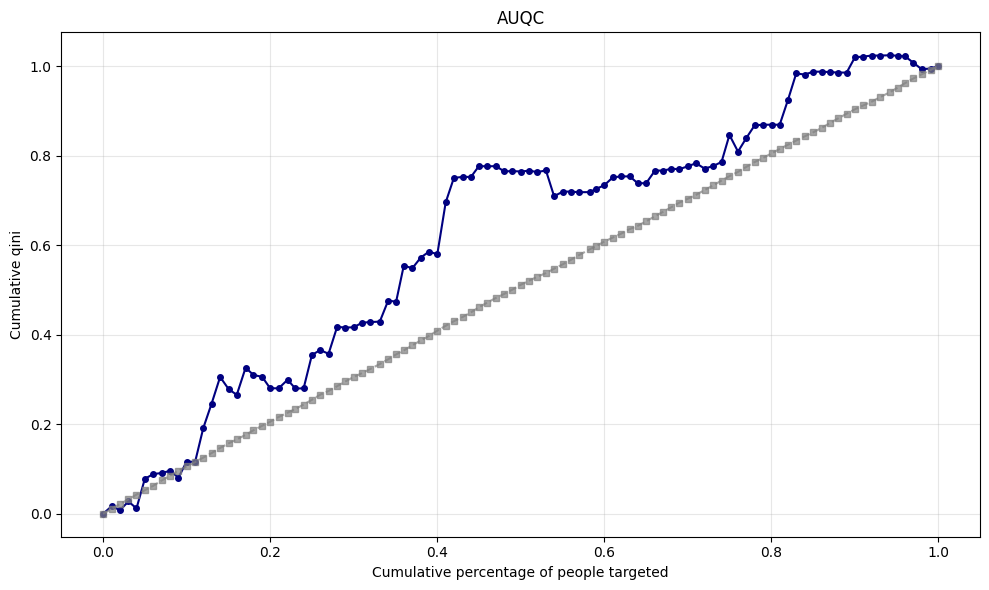

----------------------------------------
AUUC:  0.6113197406727962
AUQC:  0.6182882247565303
Lift:  1.4000672101974487
KRCC:  0.08001239148326765
seed: 366395


In [101]:
print ("Evaluating baseline🔃🔃🔃")
# Ensure the input tensor is on the same device as the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_men_test_t_on_device = x_men_test_t.to(device)

y0_pred, y1_pred = dragonnet.predict(x_men_test_t_on_device)

# Move predicted tensors back to CPU before converting to numpy arrays
uplift_pred = (y1_pred - y0_pred).cpu().numpy().flatten()

y_true = y_men_test_t.cpu().numpy().flatten() # Ensure true labels are also on CPU if they were ever moved
t_true = t_men_test_t.cpu().numpy().flatten() # Ensure true treatments are also on CPU if they were ever moved

auuc_score = auuc(y_true, t_true, uplift_pred, bins=100, plot=True)
auqc_score = auqc(y_true, t_true, uplift_pred, bins=100, plot=True)
lift_score = lift(y_true, t_true, uplift_pred, h=0.3)
krcc_score = krcc(y_true, t_true, uplift_pred, bins= 100)

print ("-"*40)
print ("AUUC: ", auuc_score)
print ("AUQC: ", auqc_score)
print ("Lift: ", lift_score)
print ("KRCC: ", krcc_score)
print (f"seed: {seed}")

In [102]:
# Xem uplift của một cá nhân bất kỳ
def get_individual_uplift(model, x_test_tensor, index):
    """
    Lấy uplift prediction của một cá nhân theo index

    Parameters:
    -----------
    model: trained DragonNet model
    x_test_tensor: tensor chứa features của test set
    index: vị trí của cá nhân muốn xem (0, 1, 2, ...)

    Returns:
    --------
    Dictionary chứa thông tin uplift của cá nhân đó
    """
    # Lấy features của cá nhân đó
    x_individual = x_test_tensor[index:index+1]  # Giữ shape [1, num_features]

    # Move the individual tensor to the same device as the model
    device = model.device # Get the device of the model using its stored attribute
    x_individual = x_individual.to(device)

    # Predict
    y0_pred, y1_pred, t_pred, _ = model.predict(x_individual)

    # Tính uplift
    uplift = (y1_pred - y0_pred).item()

    result = {
        "index": index,
        "y0_pred (control outcome)": y0_pred.item(),
        "y1_pred (treatment outcome)": y1_pred.item(),
        "uplift": uplift,
        "t_pred (propensity)": t_pred.item()
    }

    return result

# Ground truth
y_true_all = y_men_test_t.cpu().numpy().flatten()
t_true_all = t_men_test_t.cpu().numpy().flatten()

# Ví dụ: Xem uplift của cá nhân thứ 1000, 1001, 1002
for idx in [0, 1, 2]:
    info = get_individual_uplift(dragonnet, x_men_test_t, idx)
    actual_group = "Treatment" if t_true_all[idx] == 1 else "Control"
    actual_spend = y_true_all[idx]
    print(f"\n🧑 Cá nhân #{idx}:")
    print(f"   - Nhóm thực tế: {actual_group}")
    print(f"   - Spend thực tế (ground truth): ${actual_spend:.2f}")
    print(f"   - Predicted outcome nếu KHÔNG treatment: ${info['y0_pred (control outcome)']:.4f}")
    print(f"   - Predicted outcome nếu CÓ treatment:    ${info['y1_pred (treatment outcome)']:.4f}")
    print(f"   - Uplift (hiệu quả treatment):           ${info['uplift']:.4f}")
    print(f"   - Propensity score:                      {info['t_pred (propensity)']:.4f}")

ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:
# Tính uplift cho toàn bộ test set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
y0_pred, y1_pred, _, _ = dragonnet.predict(x_men_test_t.to(device))
uplift_all = (y1_pred - y0_pred).cpu().numpy().flatten()

# Ground truth
y_true_all = y_men_test_t.cpu().numpy().flatten()
t_true_all = t_men_test_t.cpu().numpy().flatten()

# Xếp hạng từ cao → thấp
sorted_indices = np.argsort(uplift_all)[::-1]  # Index theo thứ tự uplift giảm dần

# Xem top 3 người có uplift cao nhất
print("🏆 Top 3 người có uplift CAO nhất:")
for rank, idx in enumerate(sorted_indices[:3], 1):
    info = get_individual_uplift(dragonnet, x_men_test_t, idx)
    actual_group = "Treatment" if t_true_all[idx] == 1 else "Control"
    actual_spend = y_true_all[idx]
    print(f"\n#{rank} - Index gốc: {idx}")
    print(f"   - Nhóm thực tế: {actual_group}")
    print(f"   - Spend thực tế (ground truth): ${actual_spend:.2f}")
    print(f"   - Predicted y0 (control): ${info['y0_pred (control outcome)']:.4f}")
    print(f"   - Predicted y1 (treatment): ${info['y1_pred (treatment outcome)']:.4f}")
    print(f"   - Uplift: ${info['uplift']:.4f}")

# Xem top 3 người có uplift thấp nhất
print("\n\n📉 Top 3 người có uplift THẤP nhất:")
for rank, idx in enumerate(sorted_indices[-3:], 1):
    info = get_individual_uplift(dragonnet, x_men_test_t, idx)
    actual_group = "Treatment" if t_true_all[idx] == 1 else "Control"
    actual_spend = y_true_all[idx]
    print(f"\n#{rank} - Index gốc: {idx}")
    print(f"   - Nhóm thực tế: {actual_group}")
    print(f"   - Spend thực tế (ground truth): ${actual_spend:.2f}")
    print(f"   - Predicted y0 (control): ${info['y0_pred (control outcome)']:.4f}")
    print(f"   - Predicted y1 (treatment): ${info['y1_pred (treatment outcome)']:.4f}")
    print(f"   - Uplift: ${info['uplift']:.4f}")

🏆 Top 3 người có uplift CAO nhất:

#1 - Index gốc: 4921
   - Nhóm thực tế: Treatment
   - Spend thực tế (ground truth): $0.00
   - Predicted y0 (control): $1.1860
   - Predicted y1 (treatment): $2.9385
   - Uplift: $1.7525

#2 - Index gốc: 8110
   - Nhóm thực tế: Treatment
   - Spend thực tế (ground truth): $0.00
   - Predicted y0 (control): $1.1892
   - Predicted y1 (treatment): $2.9403
   - Uplift: $1.7511

#3 - Index gốc: 1353
   - Nhóm thực tế: Treatment
   - Spend thực tế (ground truth): $0.00
   - Predicted y0 (control): $1.1892
   - Predicted y1 (treatment): $2.9403
   - Uplift: $1.7511


📉 Top 3 người có uplift THẤP nhất:

#1 - Index gốc: 6976
   - Nhóm thực tế: Control
   - Spend thực tế (ground truth): $0.00
   - Predicted y0 (control): $0.8806
   - Predicted y1 (treatment): $0.4957
   - Uplift: $-0.3849

#2 - Index gốc: 1060
   - Nhóm thực tế: Control
   - Spend thực tế (ground truth): $0.00
   - Predicted y0 (control): $0.8806
   - Predicted y1 (treatment): $0.4957
   - Upl

In [ ]:
# ============================================================
# 📊 PHÂN TÍCH CHI TIẾT: Model hoạt động như thế nào?
# ============================================================

# Lấy dữ liệu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
y0_pred, y1_pred, _, _ = dragonnet.predict(x_men_test_t.to(device))
uplift_all = (y1_pred - y0_pred).cpu().numpy().flatten()
y0_pred_np = y0_pred.cpu().numpy().flatten()
y1_pred_np = y1_pred.cpu().numpy().flatten()
y_true_all = y_men_test_t.cpu().numpy().flatten()
t_true_all = t_men_test_t.cpu().numpy().flatten()

df_analysis = pd.DataFrame({
    'uplift_pred': uplift_all,
    'y0_pred': y0_pred_np,
    'y1_pred': y1_pred_np,
    'y_true': y_true_all,
    't_true': t_true_all
})

# ============================================================
# 1️⃣ SO SÁNH PREDICTED UPLIFT vs ACTUAL CATE THEO DECILE
# ============================================================
print("=" * 70)
print("1️⃣ SO SÁNH PREDICTED UPLIFT vs ACTUAL CATE THEO DECILE")
print("=" * 70)

df_analysis['decile'] = pd.qcut(df_analysis['uplift_pred'], 10, labels=False, duplicates='drop')

print(f"\n{'Decile':<10}{'N':<8}{'Pred Uplift':<15}{'Actual CATE':<15}{'Sleeping Dog?':<15}")
print("-" * 70)

results = []
for d in sorted(df_analysis['decile'].unique(), reverse=True):
    subset = df_analysis[df_analysis['decile'] == d]
    n = len(subset)
    pred_mean = subset['uplift_pred'].mean()

    y_treat = subset[subset['t_true'] == 1]['y_true'].mean()
    y_control = subset[subset['t_true'] == 0]['y_true'].mean()
    cate_actual = y_treat - y_control if not (pd.isna(y_treat) or pd.isna(y_control)) else np.nan

    results.append({'decile': d, 'pred': pred_mean, 'cate': cate_actual})

    # Sleeping Dog = CATE âm (treatment làm GIẢM chi tiêu)
    sleeping_dog = "🐕 YES" if cate_actual < 0 else ""
    print(f"{d:<10}{n:<8}${pred_mean:<14.4f}${cate_actual:<14.4f}{sleeping_dog:<15}")

# Kiểm tra monotonicity (thứ tự đúng)
print("\n" + "-" * 70)
print("📈 KIỂM TRA THỨ TỰ XẾP HẠNG:")
print("-" * 70)

cates = [r['cate'] for r in results if not pd.isna(r['cate'])]
deciles = [r['decile'] for r in results if not pd.isna(r['cate'])]

print(f"\nSo sánh CATE giữa các decile liên tiếp (từ cao → thấp):")
correct_pairs = 0
total_pairs = len(cates) - 1

for i in range(len(cates) - 1):
    is_correct = cates[i] >= cates[i + 1]
    status = "✅ Đúng" if is_correct else "❌ Sai"
    if is_correct:
        correct_pairs += 1
    print(f"   Decile {deciles[i]} (CATE=${cates[i]:.4f}) vs Decile {deciles[i+1]} (CATE=${cates[i+1]:.4f}): {status}")

print(f"\n📊 Kết quả: {correct_pairs}/{total_pairs} cặp decile có thứ tự ĐÚNG")
if correct_pairs == total_pairs:
    print("   ✅ Model xếp hạng HOÀN HẢO!")
elif correct_pairs >= total_pairs * 0.7:
    print("   ✅ Model xếp hạng TƯƠNG ĐỐI TỐT")
elif correct_pairs >= total_pairs * 0.5:
    print("   ⚠️ Model xếp hạng TRUNG BÌNH")
else:
    print("   ❌ Model xếp hạng CHƯA TỐT - cần cải thiện!")

# ============================================================
# 2️⃣ NGƯỜI CONTROL CHI TIÊU CAO - MODEL DỰ ĐOÁN THẾ NÀO?
# ============================================================
print("\n" + "=" * 70)
print("2️⃣ NGƯỜI CONTROL CHI TIÊU CAO - MODEL DỰ ĐOÁN THẾ NÀO?")
print("=" * 70)

control_mask = (t_true_all == 0)
control_indices = np.where(control_mask)[0]
control_spend = y_true_all[control_mask]
control_uplift = uplift_all[control_mask]

# Top 10 người CONTROL có chi tiêu cao nhất
top_control_spenders = np.argsort(control_spend)[::-1][:10]

print(f"\n{'Rank':<6}{'Index':<10}{'Spend GT':<15}{'Uplift Pred':<15}{'y0_pred':<12}{'y1_pred':<12}")
print("-" * 70)

for rank, idx in enumerate(top_control_spenders, 1):
    orig_idx = control_indices[idx]
    print(f"{rank:<6}{orig_idx:<10}${control_spend[idx]:<14.2f}${control_uplift[idx]:<14.4f}${y0_pred_np[orig_idx]:<11.4f}${y1_pred_np[orig_idx]:<11.4f}")

print("\n💡 Insight: Nếu model tốt, những người Control chi tiêu cao nên có y0_pred cao")

# ============================================================
# 3️⃣ KIỂM TRA SLEEPING DOGS (ACTUAL CATE < 0)
# ============================================================
print("\n" + "=" * 70)
print("3️⃣ KIỂM TRA SLEEPING DOGS (ACTUAL CATE < 0)")
print("=" * 70)

sleeping_dog_deciles = [r['decile'] for r in results if r['cate'] < 0]
if sleeping_dog_deciles:
    print(f"\n🐕 Có Sleeping Dogs ở decile: {sleeping_dog_deciles}")
    print("   → Những người này thực tế phản ứng TIÊU CỰC với treatment!")
    if max(sleeping_dog_deciles) >= 5:
        print("   ⚠️ CẢNH BÁO: Sleeping Dogs xuất hiện ở decile CAO → Model đang xếp SAI!")
else:
    print("\n✅ Không phát hiện Sleeping Dogs (CATE âm) ở bất kỳ decile nào")

# ============================================================
# 4️⃣ CONVERSION RATE THEO UPLIFT DECILE
# ============================================================
print("\n" + "=" * 70)
print("4️⃣ CONVERSION RATE (spend > 0) THEO UPLIFT DECILE")
print("=" * 70)

print(f"\n{'Decile':<10}{'N_treat':<10}{'N_ctrl':<10}{'Conv_T':<12}{'Conv_C':<12}{'Diff':<10}")
print("-" * 70)

for d in sorted(df_analysis['decile'].unique(), reverse=True):
    subset = df_analysis[df_analysis['decile'] == d]

    treat = subset[subset['t_true'] == 1]
    ctrl = subset[subset['t_true'] == 0]

    conv_t = (treat['y_true'] > 0).mean() * 100 if len(treat) > 0 else np.nan
    conv_c = (ctrl['y_true'] > 0).mean() * 100 if len(ctrl) > 0 else np.nan
    diff = conv_t - conv_c if not (pd.isna(conv_t) or pd.isna(conv_c)) else np.nan

    print(f"{d:<10}{len(treat):<10}{len(ctrl):<10}{conv_t:<11.1f}%{conv_c:<11.1f}%{diff:+.1f}%")

print("\n💡 Insight: Decile cao nên có Diff (Conv_T - Conv_C) cao hơn")

# ============================================================
# 5️⃣ PHÂN TÍCH THEO PREDICTED Y0 vs Y1
# ============================================================
print("\n" + "=" * 70)
print("5️⃣ PHÂN TÍCH PREDICTED Y0 vs Y1")
print("=" * 70)

# Correlation giữa y0_pred và y1_pred
corr = np.corrcoef(y0_pred_np, y1_pred_np)[0, 1]
print(f"\n📊 Correlation(y0_pred, y1_pred): {corr:.4f}")

if corr > 0.9:
    print("   ⚠️ Correlation rất cao → Model có thể predict y0 ≈ y1 (uplift ≈ 0)")
elif corr > 0.7:
    print("   ⚠️ Correlation khá cao → Model có thể chưa phân biệt tốt treatment effect")
else:
    print("   ✅ Correlation hợp lý → Model có thể học được treatment effect")

print(f"\n📊 Thống kê Predicted Outcomes:")
print(f"   y0_pred: mean=${y0_pred_np.mean():.4f}, std=${y0_pred_np.std():.4f}")
print(f"   y1_pred: mean=${y1_pred_np.mean():.4f}, std=${y1_pred_np.std():.4f}")
print(f"   uplift:  mean=${uplift_all.mean():.4f}, std=${uplift_all.std():.4f}")

# ============================================================
# 6️⃣ SO SÁNH VỚI RANDOM RANKING
# ============================================================
print("\n" + "=" * 70)
print("6️⃣ SO SÁNH VỚI RANDOM RANKING")
print("=" * 70)

# Tính CATE cho top 30% theo model vs random
n_top30 = int(len(uplift_all) * 0.3)

# Model ranking
model_top30_idx = np.argsort(uplift_all)[::-1][:n_top30]
model_top30 = df_analysis.iloc[model_top30_idx]
model_cate_t = model_top30[model_top30['t_true'] == 1]['y_true'].mean()
model_cate_c = model_top30[model_top30['t_true'] == 0]['y_true'].mean()
model_cate = model_cate_t - model_cate_c

# Random ranking (average of 10 random samples)
random_cates = []
for _ in range(10):
    random_idx = np.random.choice(len(uplift_all), n_top30, replace=False)
    random_top30 = df_analysis.iloc[random_idx]
    r_cate_t = random_top30[random_top30['t_true'] == 1]['y_true'].mean()
    r_cate_c = random_top30[random_top30['t_true'] == 0]['y_true'].mean()
    random_cates.append(r_cate_t - r_cate_c)
random_cate = np.mean(random_cates)

print(f"\n📊 CATE của Top 30% người được chọn:")
print(f"   - Model ranking: ${model_cate:.4f}")
print(f"   - Random ranking: ${random_cate:.4f}")
print(f"   - Improvement: {((model_cate - random_cate) / abs(random_cate) * 100) if random_cate != 0 else 0:.1f}%")

if model_cate > random_cate:
    print("\n✅ Model tốt hơn Random!")
else:
    print("\n⚠️ Model chưa tốt hơn Random - cần cải thiện!")

print("\n" + "=" * 70)

1️⃣ SO SÁNH PREDICTED UPLIFT vs ACTUAL CATE THEO DECILE

Decile    N       Pred Uplift    Actual CATE    Sleeping Dog?  
----------------------------------------------------------------------
9         1279    $1.0692        $0.7518                       
8         1272    $0.4552        $0.9843                       
7         1284    $0.2507        $1.6939                       
6         1278    $0.1540        $3.1402                       
5         1269    $0.0928        $1.2451                       
4         1287    $0.0503        $0.8906                       
3         1274    $0.0005        $0.1893                       
2         1277    $-0.0585       $-0.4689       🐕 YES          
1         1272    $-0.1233       $1.6144                       
0         1292    $-0.2458       $0.1785                       

----------------------------------------------------------------------
📈 KIỂM TRA THỨ TỰ XẾP HẠNG:
--------------------------------------------------------------------